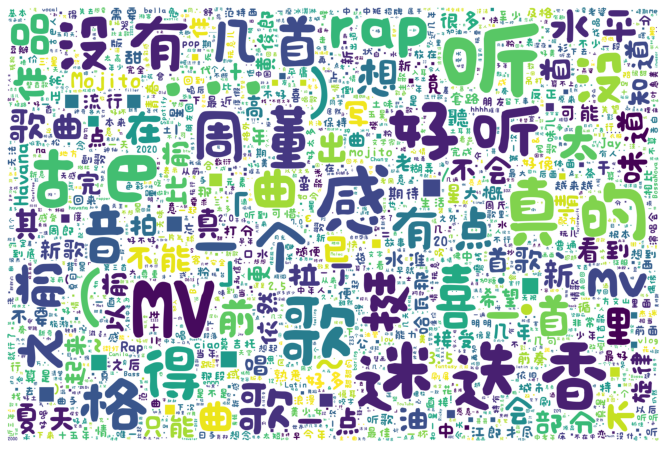

In [42]:
from bs4 import BeautifulSoup
import requests
import pandas

def get_url(n):
    url="https://music.douban.com/subject/35093585/comments/hot?p="
    url=url+str(n)
    return url



l=[]
for page in range(1,26):
    r=requests.get(get_url(page),headers={"User-agent":'Mozilla/5.0(X11;Ubuntu;Linux x86_64;rv:61.0)Gecko/20100101 Firefox/61.0'})
    soup=BeautifulSoup(r.content)
    all=soup.find_all("span",{"class":"short"})
    for i in all:
        l.append(i.text)



import jieba 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from imageio import imread


data_cut=[jieba.lcut(x) for x in l]  #将每行监测词，每个词分开 lcut（x）分词
#将句子中每个词提出

s_data_cut=pandas.Series(data_cut)

#删除无用词
with open("cn_stopwords.txt",encoding="utf-8") as f:
    stop=f.read()
stop=stop.split()
stop=stop+[" ","周杰伦","周杰","周","杰伦","董","哈哈哈"]
#得到stop

allwords=s_data_cut.apply(lambda x:[ i for i in x if i not in stop])

all_words=[]
for i in allwords:
    all_words.extend(i) #extend把所有词放入一个数组中，合并多个数组

word_count=pandas.Series(all_words).value_counts()

back_picture=imread("seven2.jpg")
wc=WordCloud(
            font_path="日系豆豆体.ttf",
            background_color="white",
            max_words=1500,
            mask=back_picture,
            max_font_size=300,
            random_state=42,
            #collocations=False    #防止重复词组
            )
#传入单词和数据的Series
wc2=wc.fit_words(word_count)
plt.figure(figsize=(16,8))
plt.imshow(wc2)
plt.axis("off")
plt.show()
wc2.to_file("mojito_by_douban_2.png")